In [ ]:
mkdir -p new_ros_ws/src
$ cd new_ros_ws
source /opt/ros/noetic/setup.bash

$ catkin init
$ catkin build

In [ ]:
$ tree -L 1 
src $ tree -L 2 -d 

In [ ]:
$ rosmsg show sensor_msgs/ TAB
$ rosmsg show sensor_msgs/Range 
$ rosmsg show sensor_msgs/Range -r

In [ ]:
$ rosmsg show hrwros_msgs/SensorInformation 

In [ ]:
$ rosrun hrwros_week1 sensor_info_publisher.py
$ rosrun pkg_name file_name

# **Week 1: ROS Essentials**

# **1. Fundamental ROS concepts**

**1. Nodes and nodelets**
* **Nodes :**
 *  They communicate with other processes using topics,
services, or the Parameter Server. 
 * Using nodes in ROS provides us with fault
tolerance and separates the code and functionalities, making the system simpler.

* **Nodelets :** These special nodes are designed
to run multiple nodes in a single process, with each nodelet being a thread (light process). 
 * This way, we avoid using the ROS network among them, but permit
communication with other nodes. 
 * With that, nodes can communicate more
efficiently, without overloading the network.



*  Nodelets are especially useful for
camera systems and 3D sensors, where the volume of data transferred is very high

* **Topics :**
 * Transport information between nodes, in the form of messages.

## **1.1 ROS Nodes** 

* Simply list all currently running nodes in the terminal:

In [ ]:
rosnode list

In [ ]:
rqt_graph

In [ ]:
rosnode info <node_name>

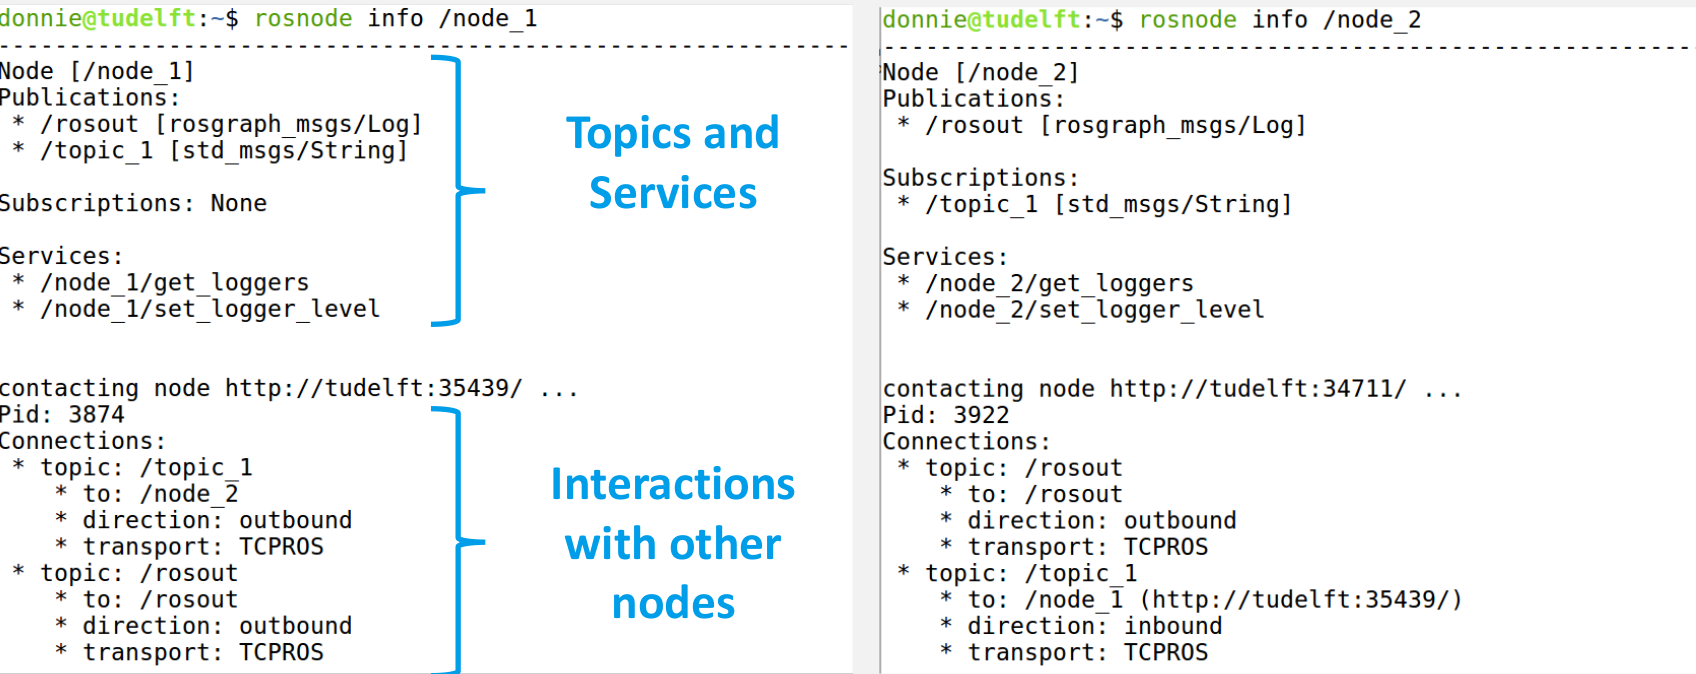

### **`Question 1`**
* Are sensors an example of a ROS node, or ROS topic?
 * **Ans:** Node 
 * because a sensor processes information and then provides data. It does not transport it between nodes.

## **1.2 ROS Topics**

ROS topics transport information between nodes. 
* This information is organized as a data structure and can have different data types.

1. Display a list of all topics that are currently being exchanged between active nodes


In [ ]:
rostopic list

 2. Print the current content of a topic in the terminal


In [ ]:
rostopic echo <topic_name>

3. Display information about the data structure of a specific topic


In [ ]:
rostopic info <topic_name>

* Command – **`rostopic info <topic name>`**

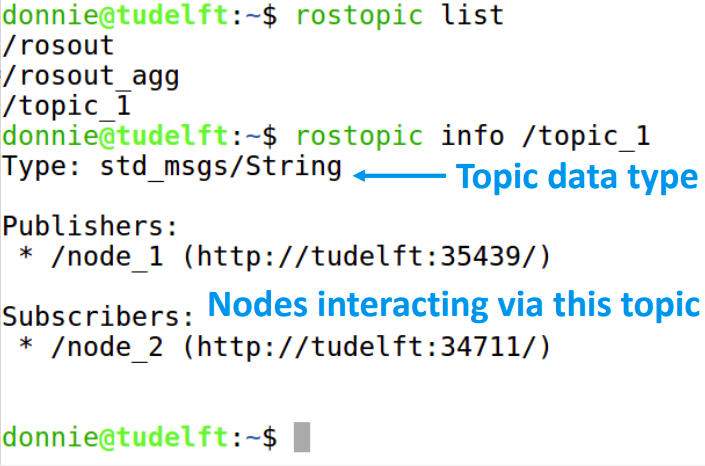

* **Important detail: Do not forget the “/” before node and topic names!**

# **2. ROS application introduction**

There are four fundamental types of ROS nodes that can be used to build a ROS application:

* Publishers
* Subscribers
* Services
* Actions


## **2.1 Publisher and subscriber nodes**


 * A ROS node that generates information is called a publisher.
 
 * A publisher sends information to nodes via topics.





### **Example code**


In [ ]:
## Node to publish a string topic.
import rospy
from std_msgs.msg import String

def simplePublisher():
    # Publisher description
    simple_publisher = rospy.Publisher('topic_1', String, queue_size=10)
    
    rospy.init_node('node_1', anonymous=False)       # Node name  
    rate = rospy.Rate(1)                             # Rate object of 2Hz

    # The string to be published on the topic
    topic1_content = "Welcome to Hello (Real) World with ROS!!!"

    while not rospy.is_shutdown():                  # Endless loop 
        simple_publisher.publish(topic1_content)
        rate.sleep()                                # sleep 


if __name__ == '__main__':
    try:
        simplePublisher()
    except rospy.ROSInterruptException:
        pass

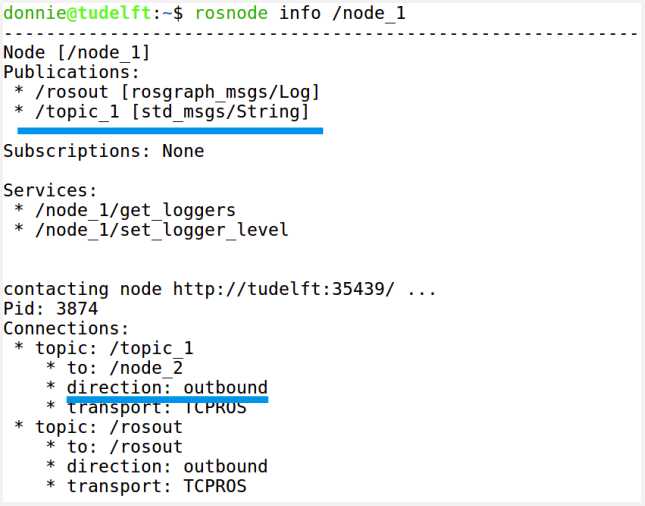

## **2.2 Subscriber nodes**



* A ROS node that receives information is called a subscriber. 
* It's subscribed to information in a topic and uses topic **`callback functions`** to process the received information. 


### **Example code**


In [ ]:
## Node to subscribe to a string and print the string on terminal.

import rospy
from std_msgs.msg import String

# 1. Topic callback function.
def stringListenerCallback(data):
    rospy.loginfo(' The contents of topic1: %s', data.data)

def stringListener():
    rospy.init_node('node_2' , anonymous = False)
    
    # 2. Initiate a Node called 'topic_subscriber'
    rospy.Subscriber('topic_1' , String, stringListenerCallback)
    
    # spin() simply keeps python from exiting until this node is stopped
    rospy.spin()

if __name__ == '__main__':
    stringListener()

    # In ROS, nodes are uniquely named.
    # If two nodes with the same  name are launched, the previous one is kicked off.
    
    # The anonymous=True flag means that rospy will choose a unique name for our 'stringListener' node 
    # so that multiple listeners can run simultaneously.


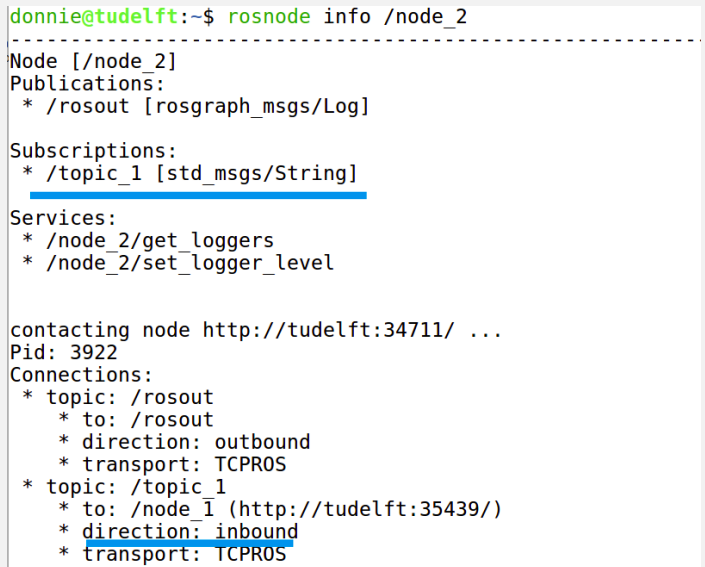

### **`Question` 1:**
*  Is the following statement True or False: A ROS Topic can be published without initializing a ROS Node.

* **False:** A ROS Topic can only be published from a ROS Node.




* In fact, you can also publish to a topic from the command line by using the command 



In [ ]:
rostopic pub topic_name topic_type topic_content

* **Note :** that this will also initialize a temporary ROS node before the topic is published.

In [ ]:
rostopic pub /topic_1 std_msgs/String "Hello (real) World with ROS"

### **`Question 2`**

* **Is the following statement True or False:** A subscriber callback function is executed continuously, that is, it is processing all the time.

* **False :**  It's not always processing, it will only process when new data is published.

* For example, if you published a ROS Topic only once, then the subscriber callback function will also be called only once.


## **2.3 ROS File system**



### **1. Focus on setting up your workspace with catkin** 

* **src** space: contains source code, this will be your main work folder
* **devel** space: contains setup files for the project ROS environment
* **build** space: contains the compiled binary files

* First, create a new folder for your workspace:


In [ ]:
mkdir -p new_ros_ws/src

* Next move to your newly created workspace using the command .



In [ ]:
cd new_ros_ws

* Thereafter, setup the correct ROS environment using the command 

In [ ]:
source /opt/ros/noetic/setup.bash

* Finally, we initialize catkin:

In [ ]:
$ catkin init
$ catkin build

* When you use **`catkin`** as the build tool for your ROS workspace, it is called a **`catkin workspace`**.

 #### **1.1 catkin workspace in ROS**

In [ ]:
$ tree -L 1 

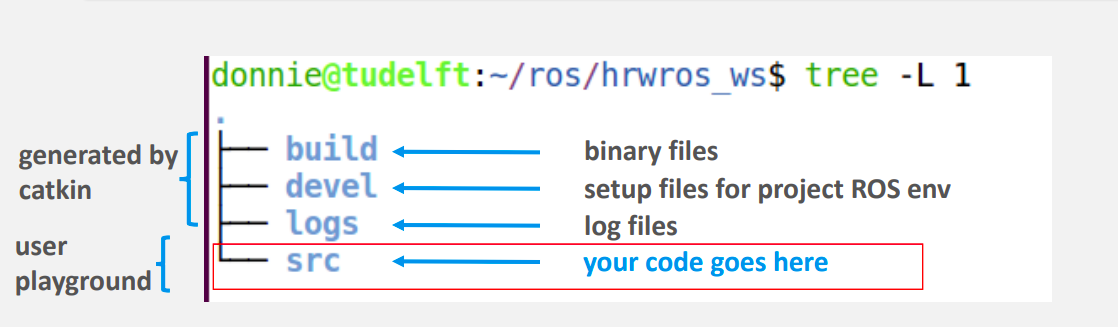

### **2. Focus on the `src` folder in your workspace and ROS packages.**

In [ ]:
src $ tree -L 2 -d 

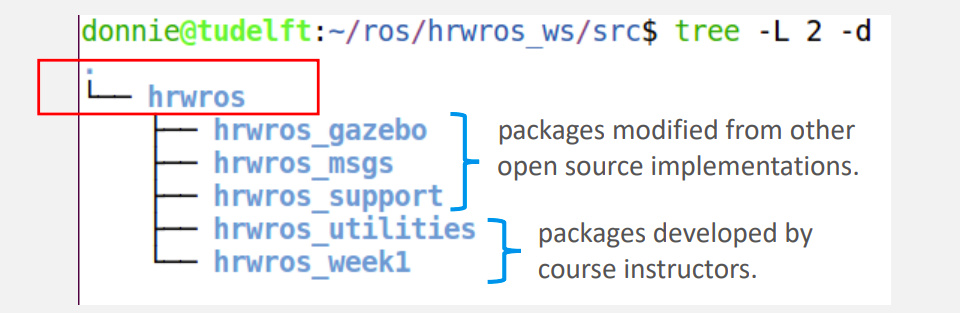

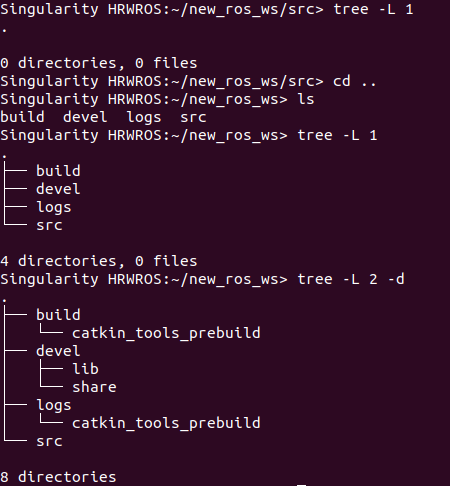

* **`catkin workspace`** – ROS package contents

 * hrwros_week1 ROS package

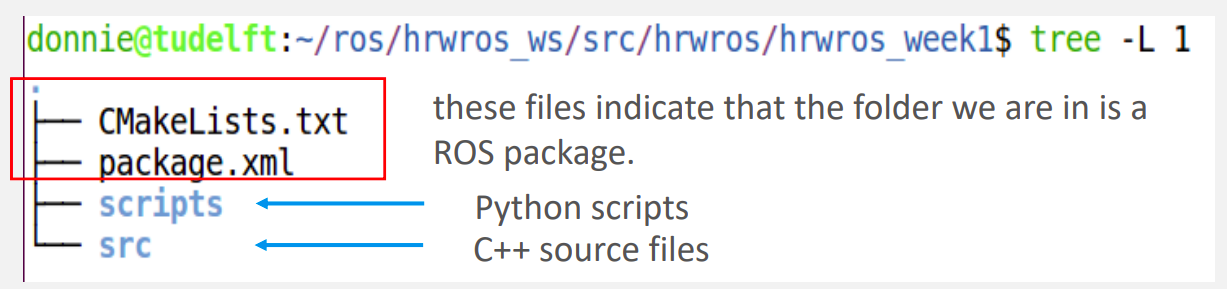

####  **2.1 `catkin wrksp `**– create new ROS package


* To create a new ROS package, we will use catkin:


In [ ]:
$ catkin_create_pkg <new_package_name> <package_deps>

In [ ]:
$ cd <path_to_ros_ws>/src
$ catkin_create_pkg hrwros_week2 std_msgs

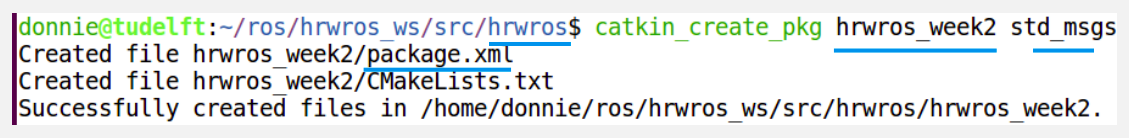

#### **2.2 `catkin wrksp` – install ROS package deps**

* install dependencies of a ROS package (listed in `package.xml`)

In [ ]:
$ cd <path_to_folder_with_ROS_package(s)>

$ rosdep install <package_name>

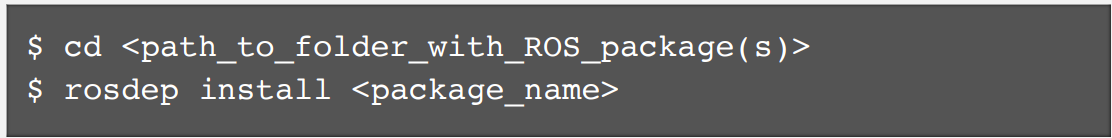

* install dependencies of all ROS packages in your source space

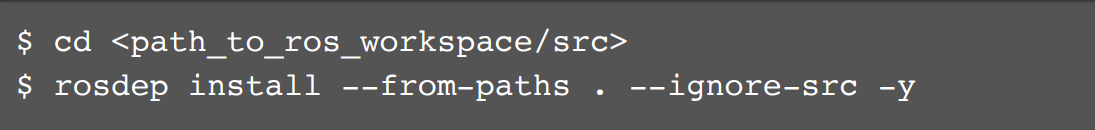

In [ ]:
$ cd <path_to_ros_workspace/src>

$ rosdep install --from-paths . --ignore-src -y

 NOTE : **You DON’T NEED the source files of all dependencies of your ROS
package! Just install your dependencies!**

## **2.4 Custom message types**

 * ROS topics having a topic type.
 * ROS message and topic types will be further explained.

* Messages are defined in **message files** of a ROS application.

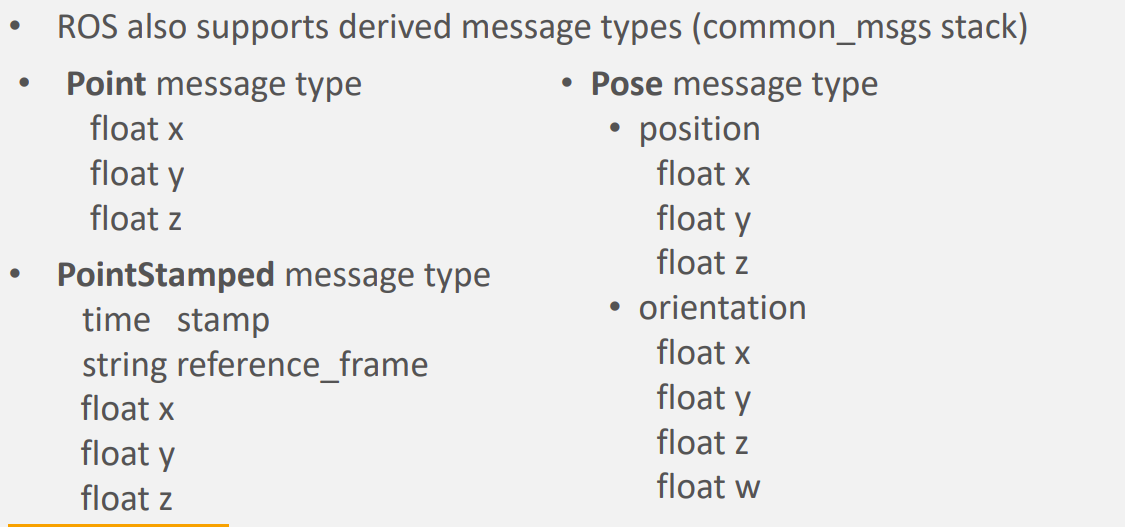

 For example, look in the **`$HOME/hrwros_ws/src/hrwros/hrwros_msgs/msg`** folder for some examples.

### **Example 1: Ultrasound distance sensor.**

We want to construct a new message type called **`SensorInformation`**. 

It should contain:

* A **ROS message type** for interfacing with distance sensors
* A **string** containing the manufacturer name
* An **unsigned integer** containing the sensor part number


We would create the following file: 






In [ ]:
$HOME/hrwros_ws/src/hrwros/hrwros_msgs/msg/SensorInformation.msg

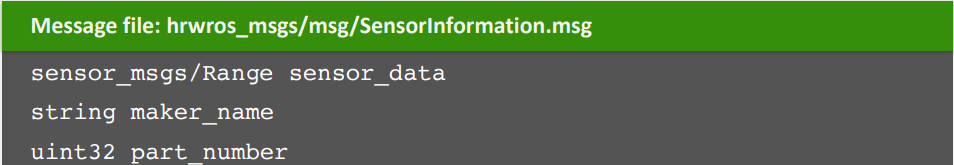

**` QUESTIONS? `**

* **How do we know what types of ROS messages are supported for sensors?**
* **What is in those message types?**
* **How do we use this in code?**


### **`Question 3 :`**
* **How many message types can be published to a topic?**

* Correct:Topics are strongly associated with only one message type.



## **2.5 Define and build custom message types**

* How to define your own message type in a message file, and
* add the file to your **`CMakeLists.txt`** to create a new ROS message type.


In [ ]:
$ source $HOME/hrwros_ws/devel/setup.bash

* First, navigate to the folder where ROS message types are defined:

In [ ]:
$ roscd hrwros_msgs
$ cd msg

* Then, create the **`messagefile`**:

In [ ]:
$ touch SensorInformation.msg

* You can see all created message types by typing

In [ ]:
$ rosmsg show sensor_msgs/ TAB 

* Since we will need the **`Range`** type, enter


In [ ]:
$ rosmsg show sensor_msgs/Range 

and you will see what the Range message type consists of.

In [ ]:
$ rosmsg show sensor_msgs/Range ENTER 

uint8 ULTRASOUND=0
uint8 INFRARED=1
std_msgs/Header header
  uint32 seq
  time stamp
  string frame_id
uint8 radiation_type
float32 field_of_view
float32 min_range
float32 max_range
float32 range

In [ ]:
$ rosmsg show sensor_msgs/Range -r

# This message also can represent a fixed-distance (binary) ranger.  This
# sensor will have min_range===max_range===distance of detection.

Header header           # timestamp in the header is the time the ranger
                        # returned the distance reading

# Radiation type enums
# If you want a value added to this list, send an email to the ros-users list
uint8 ULTRASOUND=0
uint8 INFRARED=1

uint8 radiation_type    # the type of radiation used by the sensor
                        # (sound, IR, etc) [enum]

float32 field_of_view   # the size of the arc that the distance reading is
                        # valid for [rad]  the object causing the range reading may have
                        # been anywhere within -field_of_view/2 and
                        # field_of_view/2 at the measured range.  
                        # 0 angle corresponds to the x-axis of the sensor.

float32 min_range       # minimum range value [m]
float32 max_range       # maximum range value [m]
                        # Fixed distance rangers require min_range==max_range

float32 range           # range data [m]
                        # (Note: values < range_min or > range_max should be discarded)
                        # Fixed distance rangers only output -Inf or +Inf.
                      


### **Example 2:**, We will create our own message type.

1. Create the file and contents as shown below:
 * Detail the data types the message type will contain
 * And then some comments detailing the data entries




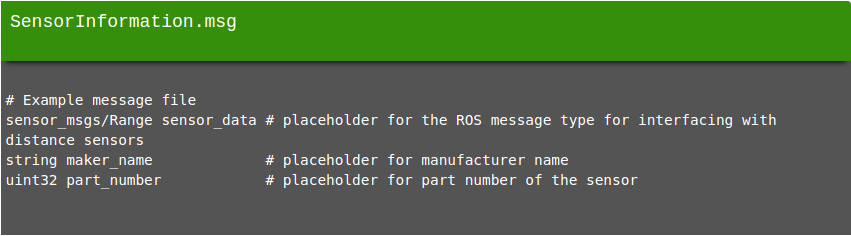

 
2. Make sure to add the name to the add_message_files section in the CMakeLists.txt file

In [ ]:
## Generate messages in the 'msg' folder
add_message_files(DIRECTORY msg
  FILES
  SensorInformation.msg
)


3. Finally, run the **`catkin build`**  command

In [ ]:
hrwros_msgs $ catkin build 

4.  We check the contents of our newly defined ROS message type with the **`rosmsg show`** command!

In [ ]:
$ rosmsg show hrwros_msgs/SensorInformation 

sensor_msgs/Range sensor_data
  uint8 ULTRASOUND=0
  uint8 INFRARED=1
  std_msgs/Header header
    uint32 seq
    time stamp
    string frame_id
  uint8 radiation_type
  float32 field_of_view
  float32 min_range
  float32 max_range
  float32 range

string maker_name

uint32 part_number


### **`Question 4 :`**

* **In our custom message definitions, we can have different fields, including those defined in other ROS packages.**

* Correct: TRUE.



### **`Question 5 :`**

* You will always have to update the **`CMakeLists.txt`** file with your new message definition and run **`catkin build`**, to make sure the python objects corresponding to your **new message definitions are available in your python scripts**.

* Correct: TRUE.



## **2.6 Publisher node with custom message type**

* You will receive a guide in making your own publisher node. 


### **1. Preparing your script file**


In [ ]:
source $HOME/hrwros_ws/devel/setup.bash

 * Let's first navigate to our Week 1 workspace folder


In [ ]:
$ roscd hrwros_week1

* Enter the scripts folder


In [ ]:
$ cd scripts

* Then, create our node python script:


In [ ]:
$ touch sensor_info_publisher.py

* We can now copy the contents of the template file**` template_publisher_script.py`** to our new python script:

In [ ]:
$ cp template_publisher_script.py sensor_info_publisher.py


* We can now start modifying our new publisher node.

### **2. Editing your script file**

In [ ]:
$ gedit sensor_info_publisher.py

In [ ]:
$ rosmsg show hrwros_msgs/SensorInformation 

* necessary to import the utilities.

In [ ]:
#!/usr/bin/env python3

# 1. Node to publish to a Sensor information topic.

import rospy
from hrwros_msgs.msg import SensorInformation  
from hrwros_utilities.sim_sensor_data import distSensorData as getSensorData


def sensorinfoPublisher():
    simple_publisher = rospy.Publisher('sensor_info', SensorInformation, queue_size=10)
    rospy.init_node('sensor_info_publisher', anonymous=False)
    rate = rospy.Rate(1)                                  # Rate object of 1Hz ( increase for faster)
   

    # The string to be published on the topic
    # topic1_content = "Welcome to Hello (Real) World with ROS!!!"

    # 2. Create a new SensorInformation object and fill in its contents. 
    sensor_info = SensorInformation()
    
    # 3. Fill in the header information (timestep and distance data of sens)
    sensor_info.sensor_data.header.stamp = rospy.Time.now()
    sensor_info.sensor_data.header.frame_id = 'distance_sensor_frame'

    # Now Fill in the sensor data information.  
    sensor_info.sensor_data.radiation_type = sensor_info.sensor_data.ULTRASOUND
    sensor_info.sensor_data.field_of_view = 0.5  # Field of view of the sensor in rad.
    sensor_info.sensor_data.min_range = 0.02  # Min distance range of the sensor in m.
    sensor_info.sensor_data.max_range = 2.0  # Max distance range of the sensor in m. 

    # Fill in the manufacturer name and part number.
    sensor_info.maker_name = 'The Ultrasound Company'
    sensor_info.part_number = 123456


    while not rospy.is_shutdown():
        # Read the sensor data from a simulated sensor 
        sensor_info.sensor_data.range = getSensorData(sensor_info.sensor_data.radiation_type, 
            sensor_info.sensor_data.min_range, sensor_info.sensor_data.max_range)
        
        # Publish the updated sensor data on this sensor_infor topic.
        si_publisher.publish(sensor_info)
        #simple_publisher.publish(topic1_content)
         # Print log message if all went well.
        rospy.loginfo("All went well. Publishing topic ")
        rate.sleep()


if __name__ == '__main__':
    try:
        sensorinfoPublisher()
    except rospy.ROSInterruptException:
        pass


**Important Note:**

* The object **`sensor_info`** should not be confused with the topic **`sensor_info`**.

### **3. Starting your new ROS node**

In [ ]:
$rosrun hrwros_week1 sensor_info_publisher.py

* This will lead to an **executable error**.
*  This error can be resolved by a simple command which makes the node executable.

In [ ]:
$ roscd hrwros_week1/scripts
$ chmod +x sensor_info_publisher.py 

### **4. Inspecting our node**

* This node is a publisher, publishing to a topic.

In [ ]:
$ rostopic list (we look for /sensor_info topic)

* Let's look at its contents.

In [ ]:
$ rostopic echo /sensor_info

* To receive some acknowledgement that a ROS node is working

In [ ]:
$ gedit sensor_info_publisher.py

* After publishing our topic we print a log message

In [ ]:
rospy.loginfo('All went well. Publishing topic')

In [ ]:
Singularity HRWROS:~/new_ros_ws/src/hrwros> rosrun hrwros_week1 sensor_info_publisher.py 
Traceback (most recent call last):
  File "/home/amit/new_ros_ws/src/hrwros/hrwros_week1/scripts/sensor_info_publisher.py", line 39, in <module>
    from hrwros_msgs.msg import SensorInformation
    
ModuleNotFoundError: No module named 'hrwros_msgs'

*  Repeat **Define and build custom message types**

In [ ]:
hrwros_msgs $ catkin build 

In [ ]:
$ rosmsg show hrwros_msgs/SensorInformation 

* **RESULST** 

In [ ]:
rosrun hrwros_week1 sensor_info_publisher.py 

```
[/sensor_info_publisher] [INFO] [1647992447.406341]: All went well. Publishing topic 
[/sensor_info_publisher] [INFO] [1647992448.406434]: All went well. Publishing topic

```




## **2.7 Subscriber ROS node with a custom message type**







In [ ]:
$ roscd hrwros_week1/scripts
$ touch sensor_info_subscriber.py
$ cp template_subscriber_script.py sensor_info_subscriber.py

In [ ]:
#!/usr/bin/env python3
# Software License Agreement (BSD License)

# Node to subscribe to a Sensor Information topic.

import rospy
from hrwros_msgs.msg import SensorInformation

# 1. Topic callback function.
def sensorInfoCallback(data):
    rospy.loginfo(' Distance reading from the sensor is : %f', data.sensor_data.range)

def sensorInfoListener():
   
    # In ROS, nodes are uniquely named. If two nodes with the same
    # name are launched, the previous one is kicked off. The
    # anonymous=True flag means that rospy will choose a unique
    # name for our 'sensorInfoListener' node so that multiple listeners can
    # run simultaneously.
    
    # 2. Initiate a Node called 'topic_subscriber'  
    rospy.init_node('sensor_info_subscriber', anonymous=False)

    rospy.Subscriber('sensor_info', SensorInformation, sensorInfoCallback)

    # spin() simply keeps python from exiting until this node is stopped
    rospy.spin()

if __name__ == '__main__':
    sensorInfoListener()


* **`template_subscriber_script.py`**

In [ ]:
import rospy
from std_msgs.msg import String


# 1. Topic callback function.
def stringListenerCallback(data):
    rospy.loginfo('%s', data.data)


def stringListener():

    # anonymous=True flag means that rospy will choose a unique name
    # for our 'stringListener' node so that multiple listeners
    # can run simultaneously.
    
    # 2. Initiate a Node called 'topic_subscriber'
    rospy.init_node('node_2', anonymous=False)

    rospy.Subscriber('topic_1', String, stringListenerCallback)

    # spin() simply keeps python from exiting until this node is stopped
    rospy.spin()

if __name__ == '__main__':
    stringListener()

### **1. Make the subscriber script executable**


In [ ]:
chmod +x sensor_info_subscriber.py

* To run our new subscriber node:

In [ ]:
$ source $HOME/hrwros_ws/devel/setup.bash
$ roscore

Then, in a separate CCS:

In [ ]:
$ source $HOME/hrwros_ws/devel/setup.bash

$ rosrun hrwros_week1 sensor_info_subscriber.py

### **2. Check with rostopic list/ Debug:**

In [ ]:
$ rostopic info /sensor_info

**`Important Note:`**

**Inspect the topic with the rostopic info when debugging your ROS problems.** 

In [ ]:
$ rosrun hwros_week1 sensor_info_publisher.py

```
[/sensor_info_subscriber] [INFO] [1647993073.013082]:  Distance reading from the sensor is : 0.654593
[/sensor_info_subscriber] [INFO] [1647993074.012779]:  Distance reading from the sensor is : 2.000000
[/sensor_info_subscriber] [INFO] [1647993075.013136]:  Distance reading from the sensor is : 2.000000
```